### Data Visualization code


Choose a file to visualize:
1. photo_6339@04-02-2022_11-46-50_0.png
2. photo_4186@25-10-2021_12-05-30_1.png
3. 04172023_1516639207_A41_0.png
4. photo_6363@04-02-2022_16-52-23_2.png
5. 04182023_100089327175666_b3_17.png
6. photo_1798@10-09-2021_10-58-47_0.png
7. photo_125@31-08-2021_16-22-06_38.png
8. photo_2714@20-09-2021_13-37-05_3.png
9. photo_6727@10-02-2022_17-50-50_0.png
10. photo_1295@08-09-2021_00-02-59_0.png
11. photo_5117@03-12-2021_10-37-57_0.png
12. photo_2664@20-09-2021_13-29-09_4.png
13. photo_5398@10-12-2021_10-28-37_0.png
14. photo_256@31-08-2021_22-34-34_0.png
15. photo_4914@16-11-2021_16-01-27_0.png
16. photo_1924@12-09-2021_18-47-31_0.png
17. 01202023_1599658989_A2_0.png
18. photo_4380@28-10-2021_05-57-20_0.png
19. photo_6308@04-02-2022_02-09-38_0.png
20. photo_1445@08-09-2021_16-52-23_15.png
21. photo_7052@21-02-2022_15-30-40_0.png
22. photo_2457@17-09-2021_15-23-00_0.png
23. 01282023_1599658989_A9_0.png
24. 01252023_1761158207_A8_5.png
25. photo_3269@28-09-2021_02-5

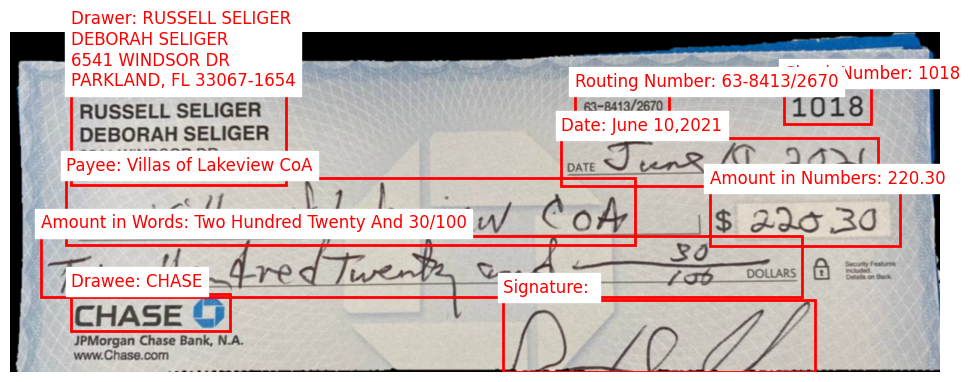

In [36]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# a visualization code that the user should choose an indx in the image list

# Define the directories for visualization
images_path = "/home/larry5/project/LLaVA-1.6-ft/data/data/03/dataset/images/train"
gts_path = images_path.replace("images", "values")

# List all image files
image_files = [f for f in os.listdir(images_path) if f[0] != "." and f.endswith('.png')]

# List all corresponding JSON files
json_files = [f.replace('.png', '.json') for f in image_files if f[0] != "."]

# Verify that both image and JSON files exist
valid_files = [(img, os.path.join(gts_path, js)) for img, js in zip(image_files, json_files) if os.path.isfile(os.path.join(gts_path, js))]

# Dictionary to store mappings
file_dict = {img: js for img, js in valid_files}

# Function to translate code to English
def translate_code(code):
    translations = {
        "\u4ed8\u6b3e\u4eba": "Drawer",
        "\u6536\u6b3e\u4eba": "Payee",
        "\u6536\u6b3e\u4eba\u8be6\u7ec6\u5730\u5740": "Payee Address",
        "\u65e5\u671f": "Date",
        "\u5c0f\u5199\u91d1\u989d": "Amount in Numbers",
        "\u5927\u5199\u91d1\u989d": "Amount in Words",
        "\u7b7e\u540d": "Signature",
        "memo_for": "Memo",
        "\u5c0f\u7f16\u53f7": "Routing Number",
        "\u652f\u7968\u7f16\u53f7": "Check Number",
        "\u94f6\u884clogo": "Drawee"
    }
    return translations.get(code, code)

# Function to visualize image and its corresponding JSON values
def visualize_file(image_file, json_file):
    # Load image
    img = Image.open(os.path.join(images_path, image_file))
    
    # Load JSON
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(img)
    
    for item in data:
        rect = item['rect']
        label = translate_code(item['type'])
        value = item['value']
        
        # Draw rectangle
        patch = patches.Rectangle(
            (rect['left'], rect['top']), rect['width'], rect['height'], 
            linewidth=2, edgecolor='red', facecolor='none'
        )
        ax.add_patch(patch)
        
        # Add label and value
        ax.text(rect['left'], rect['top'] - 10, f"{label}: {value}", color='red', fontsize=12, backgroundcolor='white')
    
    plt.axis('off')
    plt.show()

# Command line interface for user to choose file
print("Choose a file to visualize:")
for i, img in enumerate(file_dict.keys()):
    print(f"{i+1}. {img}")

choice = int(input("Enter the number of the file: ")) - 1
chosen_image = list(file_dict.keys())[choice]
chosen_json = file_dict[chosen_image]

visualize_file(chosen_image, chosen_json)


In [ ]:
1